In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
import sys
print(sys.version)

3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

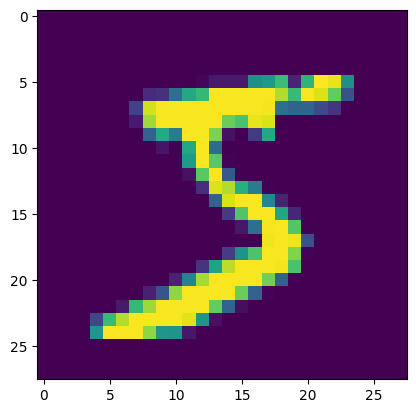

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [8]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\DELL\anaconda3\envs\pytorch_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history=model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9963 - loss: 0.0134 - val_accuracy: 0.9753 - val_loss: 0.0983
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9976 - loss: 0.0101 - val_accuracy: 0.9764 - val_loss: 0.0996
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0077 - val_accuracy: 0.9771 - val_loss: 0.0973
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9767 - val_loss: 0.1085
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9762 - val_loss: 0.1100
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9764 - val_loss: 0.1048
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9754 - val_loss: 0.1110
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9988 - loss: 0.0046 - 

In [22]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
y_pred=y_prob.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.9798

In [26]:
import matplotlib.pyplot as plt

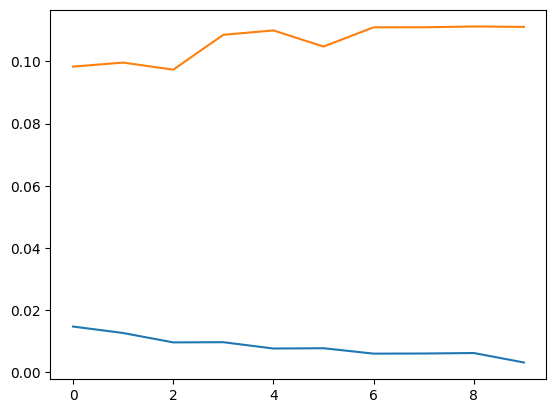

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

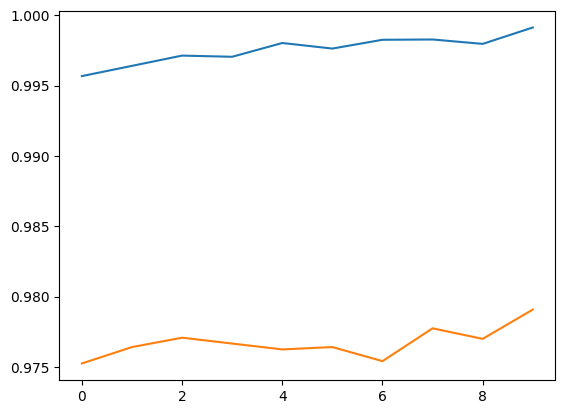

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

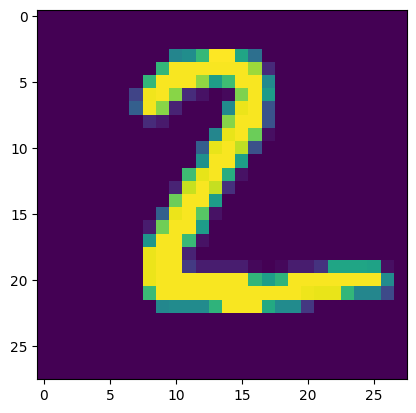

In [35]:
plt.imshow(X_test[1])

In [36]:
model.predict(X_test[1].reshape(1,28,28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.int64(2)